# Deliverable 2

In [1]:
# Import dependencies
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Set up Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [3]:
# Visit the Mars Temperature site
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [4]:
# Parse the HTML
html = browser.html
mars_temperature = soup(html, 'html.parser')

In [5]:
# Using Pandas's read_html method
mars_temperature_df = pd.read_html(url, parse_dates=['terrestrial_date'], index_col=0)[0]
mars_temperature_df

terrestrial_date   sol   ls  month  min_temp  pressure
id                                                         
2          2012-08-16    10  155      6     -75.0     739.0
13         2012-08-17    11  156      6     -76.0     740.0
24         2012-08-18    12  156      6     -76.0     741.0
35         2012-08-19    13  157      6     -74.0     732.0
46         2012-08-20    14  157      6     -74.0     740.0
...               ...   ...  ...    ...       ...       ...
1889       2018-02-23  1973  133      5     -78.0     730.0
1892       2018-02-24  1974  134      5     -77.0     729.0
1894       2018-02-25  1975  134      5     -76.0     729.0
1893       2018-02-26  1976  135      5     -77.0     728.0
1895       2018-02-27  1977  135      5     -77.0     727.0

[1867 rows x 6 columns]

In [6]:
# Scrape the title of each article on the landing page.
rows_0 = mars_temperature.find_all('tr', class_='data-row')
#rows = [row.text for row in rows_0]
#rows

In [7]:
list_td = []
for row in rows_0:
    td = row.find_all('td')
    row = [col.text for col in td]
    list_td.append(row)

In [8]:
mars_temperature_df_0 = pd.DataFrame(list_td,  columns=["id", "terrestrial_date", "sol", "ls", "month", "min_temp","pressure"])
mars_temperature_df_0

id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]

### How many months exist on Mars?

In [9]:
n_of_manths = mars_temperature_df['month'].nunique()
print("There are {0} months on Mars in the scraped dataset.". format(n_of_manths))

There are 12 months on Mars in the scraped dataset.


### How many Martian (and not Earth) days worth of data exist in the scraped dataset?

In [10]:
martian_days = mars_temperature_df['sol'].nunique()
print("There are {0} Martian (And not Earth) days in the scraped dataset.". format(martian_days))

There are 1867 Martian (And not Earth) days in the scraped dataset.


### What are the coldest and the warmest months on Mars (at the location of Curiosity)? 

In [11]:
import itertools 

#Get the answer by averaging the minimum daily temperature of all the months.
output = mars_temperature_df.groupby(['month'])['min_temp'].mean()
avg_max_temp = output.max()
avg_min_temp = output.min()
output_df = pd.DataFrame(output)

coldest_month = output_df[output_df['min_temp'] == avg_min_temp]
warmest_month = output_df[output_df['min_temp'] == avg_max_temp]

for (n, m) in zip(warmest_month.index, coldest_month.index):
    print("The warmest months on Mars is month {0}.\nAnd the coldest months on Mars is month {1}.".format(n,m))

The warmest months on Mars is month 8.
And the coldest months on Mars is month 3.


Text(0, 0.5, 'Temperature')

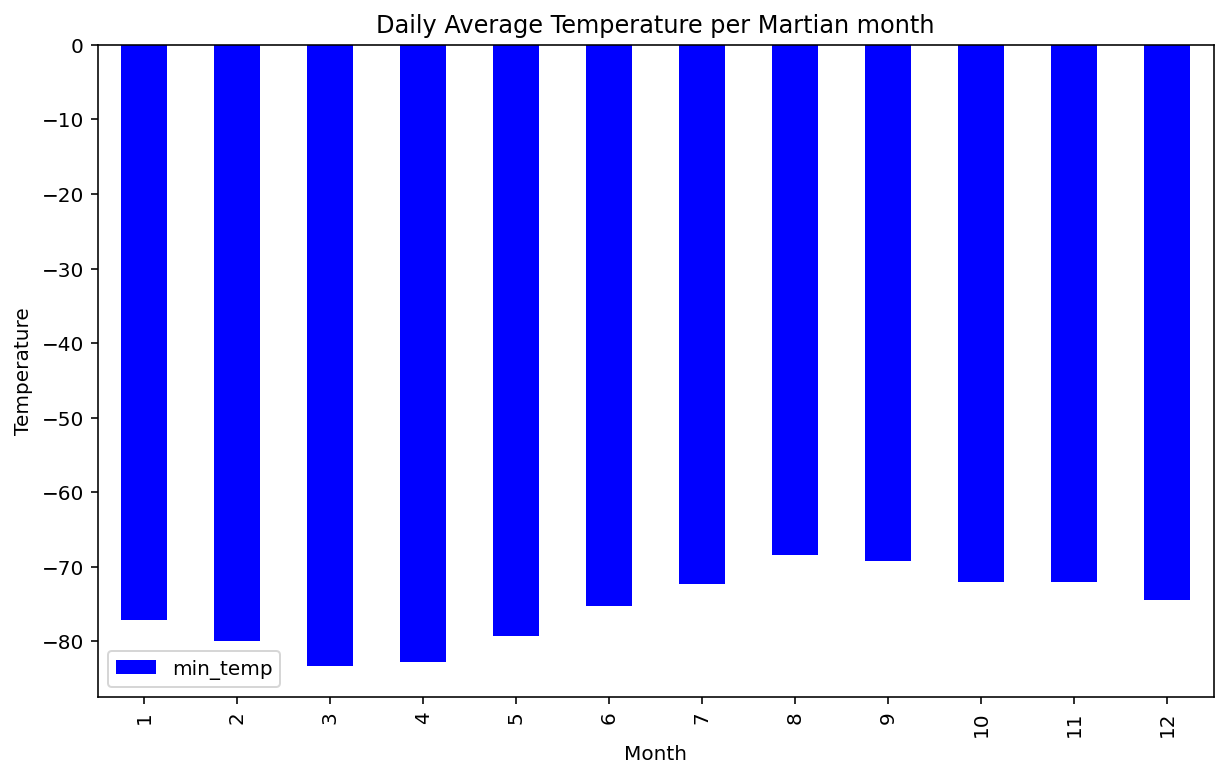

In [12]:
# Plot the results as a bar chart.
plt.rcParams["figure.figsize"] = [10, 6]
%config InlineBackend.figure_format = 'retina'

output_df.plot.bar(color = 'blue')
plt.title("Daily Average Temperature per Martian month")
plt.xlabel("Month")
plt.ylabel("Temperature")

### Which months have the lowest and the highest atmospheric pressure on Mars? 
Get the answer by averaging the daily atmospheric pressure of all the months. Plot the results as a bar chart.

In [13]:
import itertools 

#Get the answer by averaging the minimum daily temperature of all the months.
output = mars_temperature_df.groupby(['month'])['pressure'].mean()
avg_max_pressure = output.max()
avg_min_pressure = output.min()
output_df_0 = pd.DataFrame(output)

highest_pessure_month = output_df_0[output_df_0['pressure'] == avg_max_pressure]
lowest_pressure_month = output_df_0[output_df_0['pressure'] == avg_min_pressure]

for (n, m) in zip(highest_pessure_month.index, lowest_pressure_month.index):
    print("Month {0} has the highest atmospheric pressure.\nAnd month {1} has the lowest atmospheric pressure.".format(n,m))

Month 9 has the highest atmospheric pressure.
And month 6 has the lowest atmospheric pressure.


Text(0, 0.5, 'Atmospheric pressure')

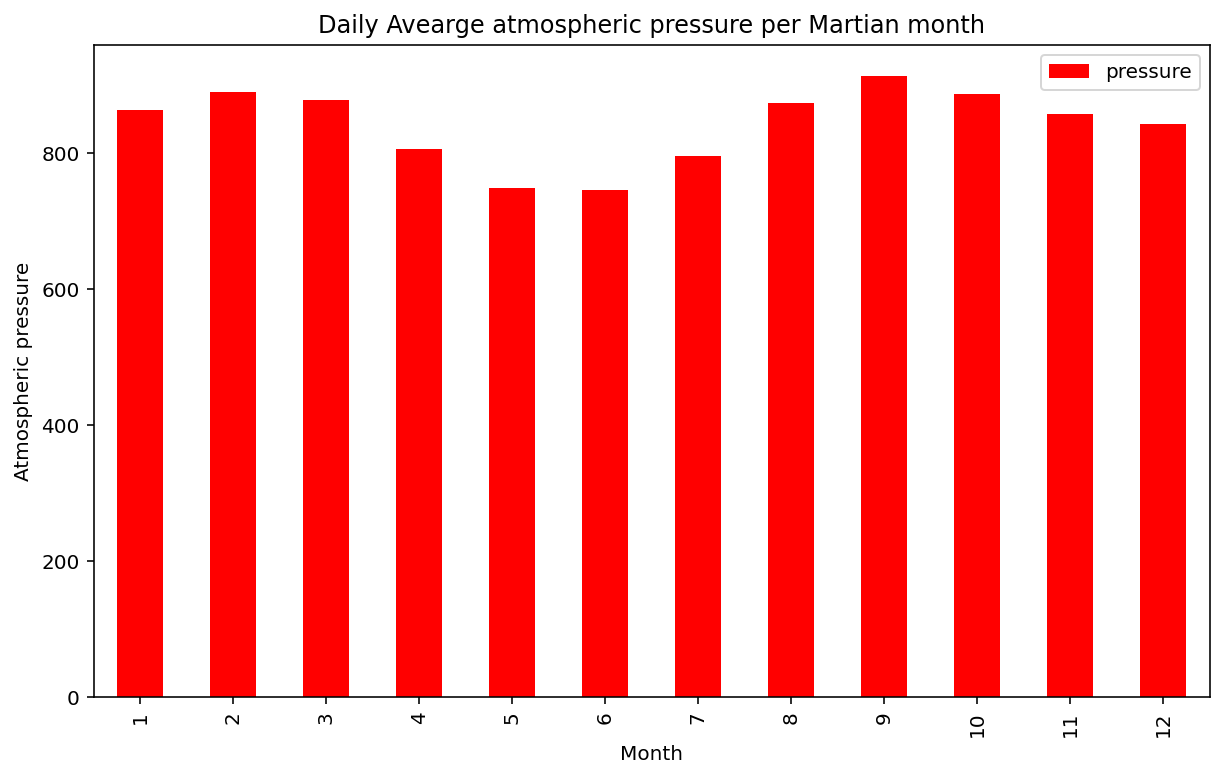

In [14]:
plt.rcParams["figure.figsize"] = [10, 6]
%config InlineBackend.figure_format = 'retina'

output_df_0.plot.bar(color = 'red')
plt.title("Daily Avearge atmospheric pressure per Martian month")
plt.xlabel("Month")
plt.ylabel("Atmospheric pressure")

### About how many terrestrial (Earth) days exist in a Martian year? 
That is, in the time that Mars circles the Sun once, how many days elapse on Earth? Visually estimate the result by plotting the daily minimum temperature.

<AxesSubplot:ylabel='terrestrial_date'>

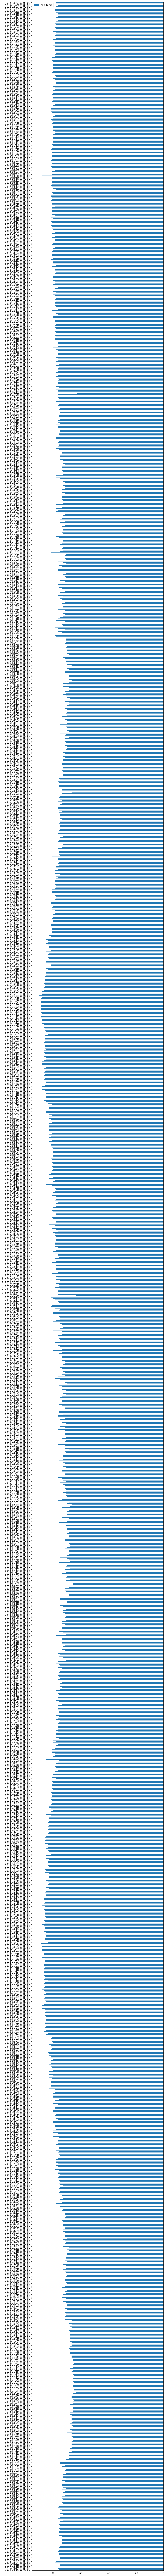

In [15]:
new_df = mars_temperature_df[['min_temp','terrestrial_date']]
new_df.index = pd.to_datetime(new_df.pop('terrestrial_date'))
plt.rcParams['figure.figsize'] = [10, 200]
new_df.plot.barh()

In [16]:
from datetime import date

d0 = date(2015, 11, 20)
d1 = date(2013, 11, 24)
delta = d0 - d1
print(delta.days)

726


In [17]:
from datetime import date

d0 = date(2016, 1, 8)
d1 = date(2014, 2, 6)
delta = d0 - d1
print(delta.days)

701


In [18]:
# Export the DataFrame to a CSV file.
mars_temperature_df.to_csv(r'Mars_weather_data.csv')